### Loading the dataset

In [27]:
car_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
car_names = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names"

In [28]:
import pandas as pd
df = pd.read_csv(car_data)
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [29]:
attributes = ['buying','maint','doors','persons','lug_boot','safety','target']
df = pd.read_csv(car_data,header=None,index_col=False,names=attributes)
df

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### Preparing the dataset

In [30]:
df = df.replace(['vhigh','high','med','low','small','big'],[4,3,2,1,1,3])
df

,buying,maint,doors,persons,lug_boot,safety,target
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,5more,more,2,2,good
1724,1,1,5more,more,2,3,vgood
1725,1,1,5more,more,3,1,unacc
1726,1,1,5more,more,3,2,good


In [31]:
df.doors = df.doors.replace('5more',5)

In [32]:
df.persons = df.persons.replace('more',5)

In [33]:
df

,buying,maint,doors,persons,lug_boot,safety,target
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,good
1724,1,1,5,5,2,3,vgood
1725,1,1,5,5,3,1,unacc
1726,1,1,5,5,3,2,good


### Train Test Split

In [34]:
X,y = df.iloc[:,:-1],df.target

In [35]:
from sklearn.model_selection import train_test_split,cross_validate
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Decision Tree

In [36]:
#from sklearn.tree import DecisionTreeClassifier
#dtree_clf = DecisionTreeClassifier(random_state=42)
#dt_clf = dtree_clf.fit(X_train,y_train)

from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators = 10, random_state=0)
rf_clf = rforest.fit(X_train,y_train)

In [37]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#plt.figure(figsize=(50,50))
#plot_tree(rf_clf,
 #         filled =True,
#        rounded=True,
 #         class_names=["unacc","acc","good","vgood"],
  #        feature_names=X.columns)

### Training Accuracy

In [38]:
cv = cross_validate(rf_clf,X_train,y_train,cv=5)

def print_scores(cv):
    #print out cross validation scores
    [print('Crossvalidation fold: {}  Accuracy: {}'.format(n, score)) for n, score in enumerate(cv['test_score'])]
    
    #print out the mean of the cross validation
    print('Mean train cross validation score {}'.format(cv['test_score'].mean()))
    
print_scores(cv)

Crossvalidation fold: 0  Accuracy: 0.9545454545454546
Crossvalidation fold: 1  Accuracy: 0.9710743801652892
Crossvalidation fold: 2  Accuracy: 0.9380165289256198
Crossvalidation fold: 3  Accuracy: 0.9504132231404959
Crossvalidation fold: 4  Accuracy: 0.950207468879668
Mean train cross validation score 0.9528514111313056


### Test Accuracy

In [39]:
cv_test = cross_validate(rf_clf,X_test,y_test,cv=5)

def print_scores(cv):
    #print out cross validation scores
    [print('Crossvalidation fold: {}  Accuracy: {}'.format(n, score)) for n, score in enumerate(cv['test_score'])]
    
    #print out the mean of the cross validation
    print('Mean test cross validation score {}'.format(cv['test_score'].mean()))
    
print_scores(cv_test)

Crossvalidation fold: 0  Accuracy: 0.9423076923076923
Crossvalidation fold: 1  Accuracy: 0.9038461538461539
Crossvalidation fold: 2  Accuracy: 0.9134615384615384
Crossvalidation fold: 3  Accuracy: 0.9423076923076923
Crossvalidation fold: 4  Accuracy: 0.8932038834951457
Mean test cross validation score 0.9190253920836444


### Confusion matrix (of train values)

C:\Users\shahi\anaconda3\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


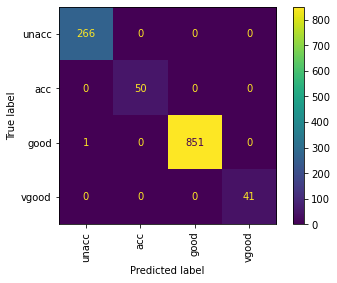

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_clf, X_train, y_train, display_labels=["unacc","acc","good","vgood"],xticks_rotation=90)

### Confusion Matrix (of test values)

C:\Users\shahi\anaconda3\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


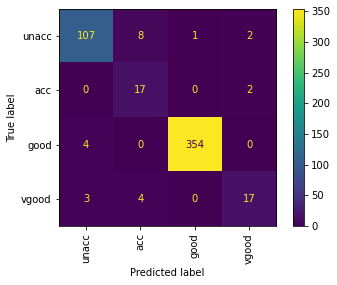

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_clf, X_test, y_test, display_labels=["unacc","acc","good","vgood"],xticks_rotation=90)

In [42]:
from sklearn.metrics import accuracy_score

predictions = rf_clf.predict(X_test)

acc_score = accuracy_score(y_test, predictions)
print("Accuracy score of test values:",round(acc_score,4)*100,"%")

Accuracy score of test values: 95.38 %
